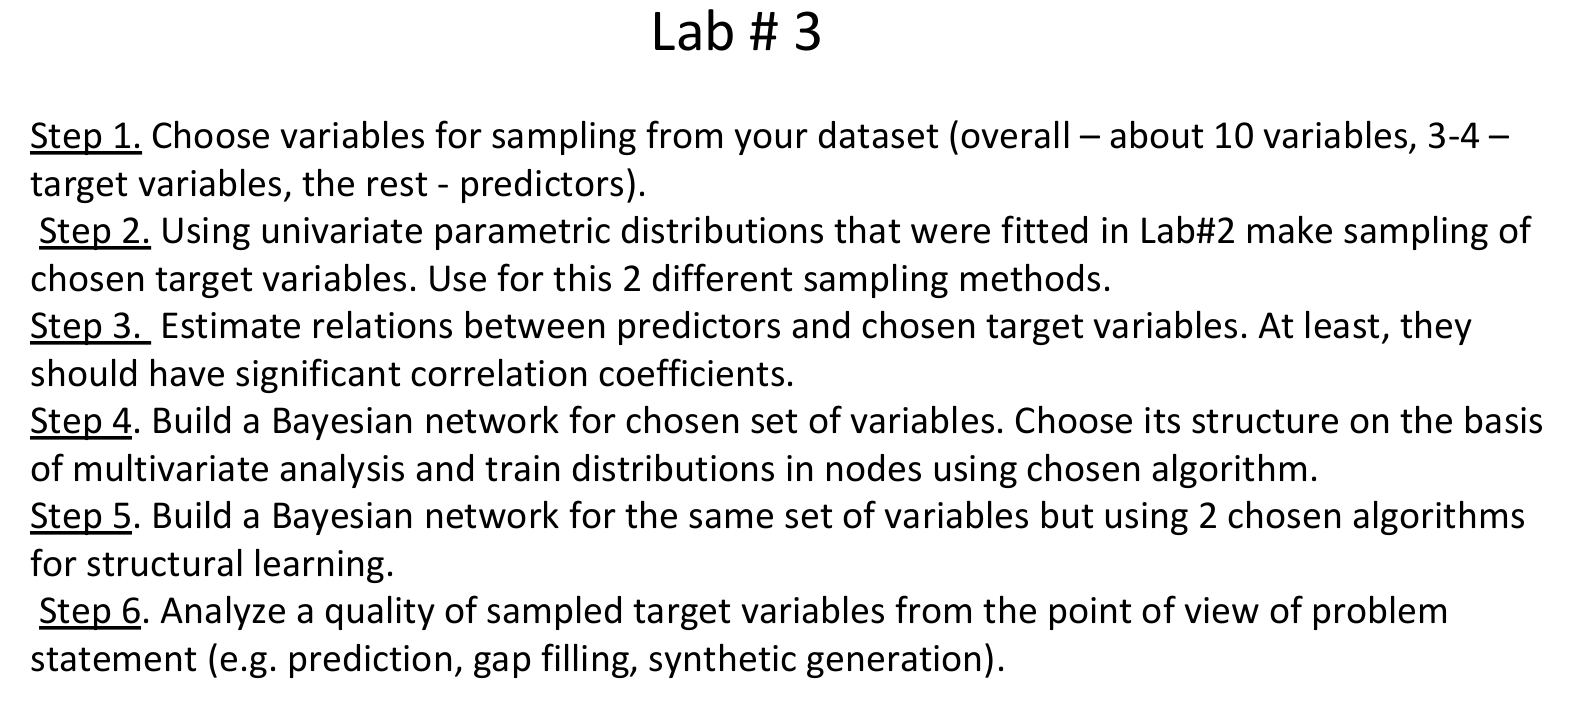

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import make_dataset

In [7]:
cols = pd.read_csv('columns_description.csv')
# cols.columns
print(cols['description'])

0                                     date (YYYY-MM-DD)
1                                          hour (HH:00)
2     Amount of precipitation in millimetres (last h...
3            Atmospheric pressure at station level (mb)
4     Maximum air pressure for the last hour in hPa ...
5     Minimum air pressure for the last hour in hPa ...
6                                 Solar radiation KJ/m2
7          Air temperature (instant) in celsius degrees
8     Dew point temperature (instant) in celsius deg...
9     Maximum temperature for the last hour in celsi...
10    Minimum temperature for the last hour in celsi...
11    Maximum dew point temperature for the last hou...
12    Minimum dew point temperature for the last hou...
13    Maximum relative humid temperature for the las...
14    Minimum relative humid temperature for the las...
15                        Relative humid in % (instant)
16             Wind direction in radius degrees (0-360)
17                       Wind gust in metres per

In [8]:
def prepare_df(df):
    abbreviation = ['date','hour','prcp', 'stp', 'smax', 'smin','gbrd','temp','dewp','tmax','tmin','dmax','dmin','hmax','hmin','hmdy','wdct', 'gust', 'wdsp', 'regi','prov','wsnm','inme','lat','lon','elvt']

    
    df.drop(['index'],inplace=True, axis=1)
    df.columns = abbreviation
    df = make_dataset.clean_na(df)
    df['date_time'] = pd.to_datetime(df['date'] + ' ' +  df['hour'])
    df.drop(['date','hour'], inplace=True, axis=1)

    return df

In [9]:
source_df = pd.read_csv("south20k.csv", engine='python')
# source_df = prepare_df(source_df)
source_df

,Unnamed: 0,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,tmin,...,gust,wdsp,regi,prov,wsnm,inme,lat,lon,elvt,date_time
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2000-09-22 00:00:00
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2000-09-22 01:00:00
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2000-09-22 02:00:00
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2000-09-22 03:00:00
4,4,0.0,1013.9,1014.2,1013.2,NaN,15.5,14.6,15.6,15.5,...,4.4,1.2,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2000-09-22 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,0.0,976.6,976.6,976.2,0.0,6.1,3.8,6.5,6.1,...,4.7,2.3,S,RS,SANTANA DO LIVRAMENTO,A804,-30.8425,-55.612778,196.00,2002-08-07 03:00:00
19996,19996,0.0,976.6,976.6,976.2,0.0,6.1,3.8,6.5,6.1,...,4.7,2.3,S,RS,SANTANA DO LIVRAMENTO,A804,-30.8425,-55.612778,196.00,2002-08-07 04:00:00
19997,19997,0.0,976.6,976.6,976.2,0.0,6.1,3.8,6.5,6.1,...,4.7,2.3,S,RS,SANTANA DO LIVRAMENTO,A804,-30.8425,-55.612778,196.00,2002-08-07 05:00:00
19998,19998,0.0,976.6,976.6,976.2,0.0,6.1,3.8,6.5,6.1,...,4.7,2.3,S,RS,SANTANA DO LIVRAMENTO,A804,-30.8425,-55.612778,196.00,2002-08-07 06:00:00


In [10]:
prcp = source_df['prcp'].dropna()
gbrd = source_df['gbrd'].dropna()
temp = source_df['temp'].dropna()

SAMPLING

To start with, let’s have a look at some basic terminology. It is important to learn the concepts of population and sample. The population is the set of all observations (individuals, objects, events, or procedures) and is usually very large and diverse, whereas a sample is a subset of observations from the population that ideally is a true representation of the population.

**Inverse transform sampling**

In [11]:
import numpy as np
import scipy.interpolate as interpolate

def inverse_transform_sampling(data, n_bins=40, n_samples=19950):
    hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r), cum_values[1:]

def plot_CDF(x):
    plt.plot(x)
    plt.title("inverse CDF")
    plt.xlabel("sample space")
    plt.ylabel("uniform labels")
    
def plot_true_sampling(true_vals, sampling):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(true_vals, label='True', bins = 20, color='blue', alpha=0.5)
    ax.hist(sampling, label='sampeled', bins = 20, color='yellow', alpha=0.5)
    ax.legend(loc='upper right')
    plt.ylabel("Count")
    plt.show()
    
    
def plot_true_sampling_kdensity(true_vals, sampling):
    sns.kdeplot(data=[true_vals, sampling])

Target vars:

**prcp, gbrd, temp**

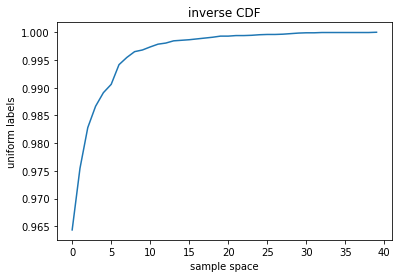

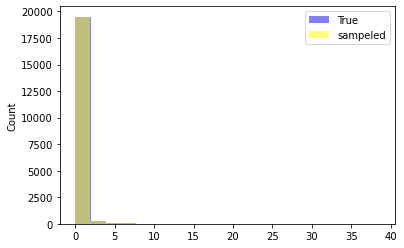

NameError: name 'st' is not defined

In [12]:
# Sample Solar Radiation with inverse-transforme sampling 
# Analyse the quality 

sampling_prcp, CDF_prcp = inverse_transform_sampling(prcp)

plot_CDF(CDF_prcp)
plot_true_sampling(prcp, sampling_prcp)

mean_sample_prcp = st.mean(sampling_prcp)
mean_real_prcp = st.mean(prcp)
stdev_sample_prcp = st.stdev(sampling_prcp)
stdev_real_prcp = st.stdev(prcp)

print(f' Mean sample: {mean_sample_prcp}, mean real data: {mean_real_prcp}')
print(f' Stdev sample: {stdev_sample_prcp}, stdev real data: {stdev_real_prcp}')

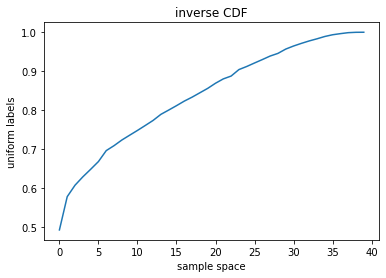

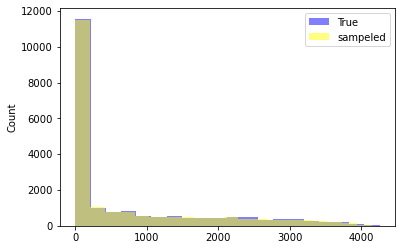

NameError: name 'st' is not defined

In [13]:
sampling_gbrd, CDF_gbrd = inverse_transform_sampling(gbrd)

plot_CDF(CDF_gbrd)
plot_true_sampling(gbrd, sampling_gbrd)


mean_sample_gbrd = st.mean(sampling_gbrd)
mean_real_gbrd = st.mean(gbrd)
stdev_sample_gbrd = st.stdev(sampling_gbrd)
stdev_real_gbrd = st.stdev(gbrd)

print(f' Mean sample: {mean_sample_gbrd}, mean real data: {mean_real_gbrd}')
print(f' Stdev sample: {stdev_sample_gbrd}, stdev real data: {stdev_real_gbrd}')

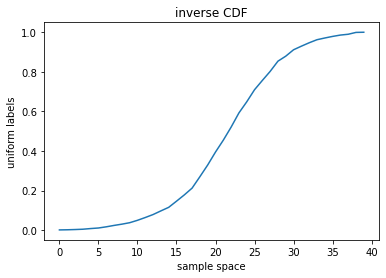

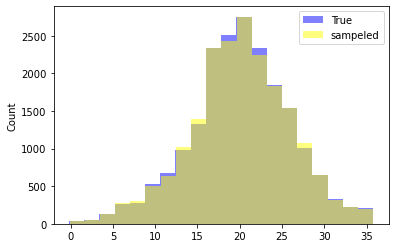

NameError: name 'st' is not defined

In [14]:
sampling_temp, CDF_temp = inverse_transform_sampling(temp)
plot_CDF(CDF_temp)
plot_true_sampling(temp, sampling_temp)


mean_sample_temp = st.mean(sampling_temp)
mean_real_temp = st.mean(temp)
stdev_sample_temp = st.stdev(sampling_temp)
stdev_real_temp = st.stdev(temp)

print(f' Mean sample: {mean_sample_temp}, mean real data: {mean_real_temp}')
print(f' Stdev sample: {stdev_sample_temp}, stdev real data: {stdev_real_temp}')

In [15]:
import statistics as st

**Random sampling**

Variable - Temperature

NameError: name 'smpl_data' is not defined

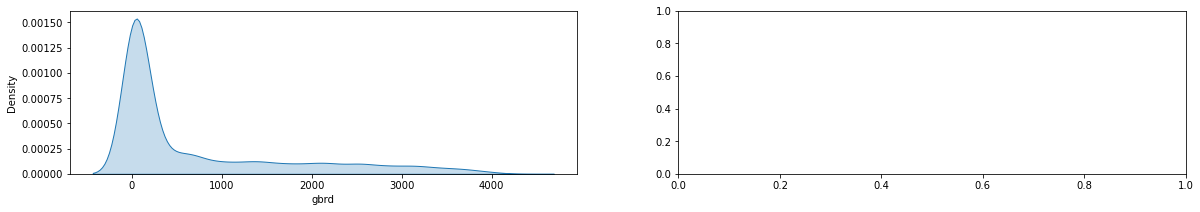

In [16]:
df = source_df[['gbrd', 'prcp', 'temp', 'wdsp', 'hmdy', 'lat', 'wdct', 'gust', 'stp']]
df.dropna()

labels =[gbrd, prcp, temp]


for l in labels:
    fig, axes = plt.subplots(1, 2, figsize=(20, 3))
    sns.kdeplot(ax=axes[0], data=df, x=l, shade=True)
    
    # Random sample
    sample_data = df.sample(frac=.75)
    smpl_data.append(list(sample_data))
    sns.kdeplot(ax=axes[1], data=sample_data, x=l, shade=True, color='orange')

    
    axes[0].set_title('Real')
    axes[1].set_title('Random sample')
    plt.show()
    

In [17]:
random_sample_data_gbrd = df.gbrd.sample(frac=.75)
random_sample_data_prcp = df.prcp.sample(frac=.75)
random_sample_data_temp = df.temp.sample(frac=.75)

mean_random_gbrd = random_sample_data_gbrd.mean()
mean_random_prcp = random_sample_data_prcp.mean()
mean_random_temp = random_sample_data_temp.mean()

std_random_gbrd = random_sample_data_gbrd.std()
std_random_prcp = random_sample_data_prcp.std()
std_random_temp = random_sample_data_temp.std()

print("Let's analyse the quality of random sampling for our data:")
print(f' gbrd: Mean sample: {mean_random_gbrd}, mean real data: {mean_real_gbrd}')
print(f' gbrd: Stdev sample: {std_random_gbrd}, stdev real data: {stdev_real_gbrd}')
print(f' prcp: Mean sample: {mean_random_prcp}, mean real data: {mean_real_prcp}')
print(f' prcp: Stdev sample: {std_random_prcp}, stdev real data: {stdev_real_prcp}')
print(f' temp: Mean sample: {mean_random_temp}, mean real data: {mean_real_temp}')
print(f' temp: Stdev sample: {std_random_temp}, stdev real data: {stdev_real_temp}')


Let's analyse the quality of random sampling for our data:


NameError: name 'mean_real_gbrd' is not defined

In [18]:
random_sample_data_gbrd.mean()

724.9259703881553

**Step 3. Estimate relations between predictors and chosen target variables. At least, they
should have significant correlation coefficients.**

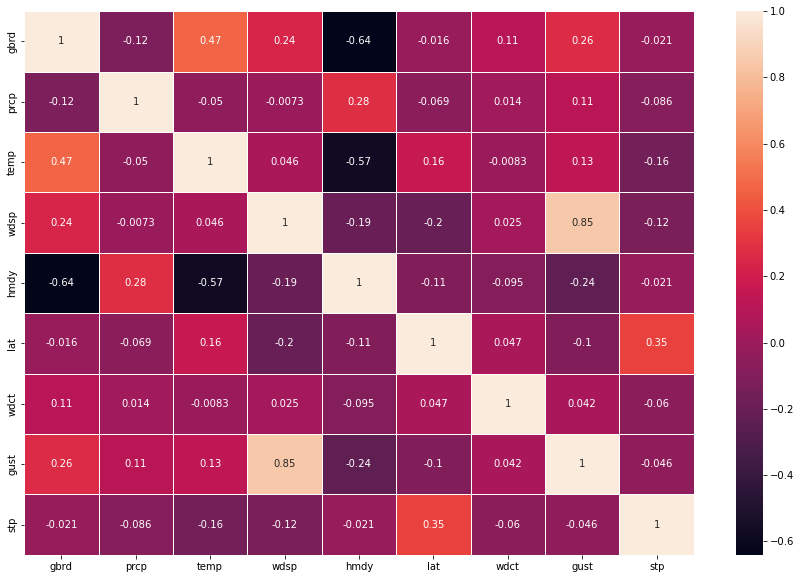

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=.5)
plt.show()


# corr = {'prcp': ['hmdy', 'gust'],
#         'gbrd': ['wdsp', 'hmdy', 'wdct', 'gust'],
#         'temp': ['hmdy', 'lat', 'gust', "stp"],}

In [20]:
# Build Bayesian network for chosen variables
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling


In [21]:
from pgmpy.estimators import BicScore
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import TreeSearch

In [22]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from collections import Counter
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [23]:
# df.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
# df.drop(df.tail(20).index,inplace=True) # drop last n rows
# df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
# df.dewp.dropna()

df = df.dropna()
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
df = df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19990 entries, 10 to 19999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gbrd    19990 non-null  float64
 1   prcp    19990 non-null  float64
 2   temp    19990 non-null  float64
 3   wdsp    19990 non-null  float64
 4   hmdy    19990 non-null  float64
 5   lat     19990 non-null  float64
 6   wdct    19990 non-null  float64
 7   gust    19990 non-null  float64
 8   stp     19990 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


In [25]:
#data preparation
# We should convert continious variables to discrite

data = df
data = data.dropna()

In [102]:
# we use kmeans cluster method for discretization
data_keys = ['gbrd', 'prcp', 'temp', 'wdsp', 'hmdy', 'lat', 'wdct', 'gust', 'stp']
discretizer = KBinsDiscretizer(n_bins=30, encode="ordinal", strategy="kmeans")
data_descrete = discretizer.fit_transform(data.values)
data_descrete = pd.DataFrame(data_descrete, columns=data_keys)

data_descrete

/Users/murovadarya/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:219: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/Users/murovadarya/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(


,gbrd,prcp,temp,wdsp,hmdy,lat,wdct,gust,stp
0,0.0,0.0,12.0,6.0,24.0,2.0,18.0,10.0,26.0
1,3.0,0.0,12.0,7.0,24.0,2.0,13.0,7.0,26.0
2,10.0,0.0,13.0,7.0,21.0,2.0,13.0,8.0,26.0
3,16.0,0.0,15.0,7.0,15.0,2.0,15.0,6.0,27.0
4,19.0,0.0,15.0,5.0,10.0,2.0,17.0,8.0,26.0
...,...,...,...,...,...,...,...,...,...
19985,0.0,0.0,5.0,7.0,24.0,1.0,14.0,6.0,11.0
19986,0.0,0.0,5.0,7.0,24.0,1.0,14.0,6.0,11.0
19987,0.0,0.0,5.0,7.0,24.0,1.0,14.0,6.0,11.0
19988,0.0,0.0,5.0,7.0,24.0,1.0,14.0,6.0,11.0


In [103]:
def get_scores(data, samples, descritizer=discretizer):

    data_continious = descritizer.inverse_transform(data.values)
    data_continious = pd.DataFrame(data_continious, columns=data_keys)
    sample_continious = descritizer.inverse_transform(samples.values)
    sample_continious = pd.DataFrame(sample_continious, columns=data_keys)

    y_true = np.sort(data_continious['temp'].iloc[:2000].values)
    y_pred = np.sort(sample_continious['temp'].iloc[:2000].values)

    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0,1]
    R_sq = corr**2

    print(f'R-2 score is: {R_sq}')
    print(f'RMSE is: {sqrt(mean_squared_error(y_true, y_pred))}')
    print(f'MAE is: {mean_absolute_error(y_true, y_pred)}')
    return R_sq, sqrt(mean_squared_error(y_true, y_pred)), mape(y_true, y_pred)

In [104]:
data_rmse = []
data_mape = []
data_r2 = []

In [105]:
# modeling edges based on the analisys from step 3


model = BayesianModel([
    ('prcp', 'hmdy'),
    ('prcp', 'gust'),
    ('gbrd', 'wdsp'),
    ('gbrd', 'hmdy'),
    ('gbrd', 'wdct'),
    ('gbrd', 'gust'),
    ('temp', 'hmdy'),
    ('temp', 'lat'),
    ('temp', 'gust'),
    ('temp', 'stp')
])

/Users/murovadarya/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


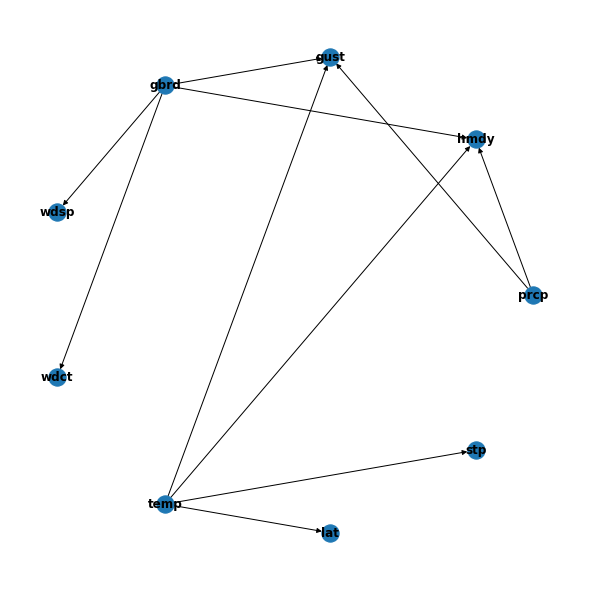

In [106]:
import networkx as nx

network = nx.DiGraph()
network.add_edges_from(model.edges())
pos = nx.layout.circular_layout(network)
plt.figure(figsize=(8, 8))
nx.draw(network, pos, with_labels=True, font_weight="bold")

In [107]:
df_trans = df.iloc[:, :].copy()

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data_discr = est.fit_transform(df_trans.values[:, :])
df_trans[df_trans.columns[:]] = data_discr

df_prob = df_trans.iloc[:2000, :].copy()
df_trans = df_trans.iloc[2000:,:].copy()

In [108]:
model.fit(df_trans)

print(model.check_model())

True


In [109]:
from seaborn import distributions
from functools import partial
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics, model_selection
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy
from pgmpy.estimators import HillClimbSearch, TreeSearch, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
from pgmpy.base import DAG
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [110]:
k2_scores = {}

k2_scores["manual"] = K2Score(df_trans).score(model)
print(f"K2 score of hand-crafted model {K2Score(df_trans).score(model):.2f}")
print(f"BIC score of hand-crafted model {BicScore(df_trans).score(model):.2f}")

K2 score of hand-crafted model -187521.45
BIC score of hand-crafted model -191857.19


In [111]:
def sampling(bn: DAG, data: pd.DataFrame, n: int = 100, new: bool = False):
    if new:
        bn_new = BayesianModel(bn.edges())
        bn_new.fit(data)
    else:
        bn_new = bn
    sampler = BayesianModelSampling(bn_new)
    sample = sampler.forward_sample(size=n)
    return sample

In [112]:
df_s1 = sampling(model, df_prob, n=19500, new=True)
df_s1

/Users/murovadarya/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


  0%|          | 0/9 [00:00<?, ?it/s]

/Users/murovadarya/opt/anaconda3/lib/python3.9/site-packages/pgmpy/utils/mathext.py:83: UserWarning: Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
  warn(


,prcp,hmdy,gust,gbrd,wdsp,wdct,temp,lat,stp
0,0.0,1.0,1.0,4.0,1.0,0.0,2.0,2.0,4.0
1,0.0,2.0,2.0,0.0,1.0,0.0,4.0,2.0,3.0
2,0.0,2.0,2.0,0.0,2.0,2.0,4.0,2.0,3.0
3,0.0,4.0,0.0,0.0,1.0,2.0,3.0,2.0,3.0
4,1.0,4.0,4.0,0.0,3.0,0.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...
19495,0.0,4.0,1.0,0.0,0.0,1.0,2.0,2.0,4.0
19496,0.0,4.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0
19497,0.0,2.0,2.0,2.0,0.0,1.0,2.0,2.0,3.0
19498,0.0,4.0,1.0,0.0,0.0,1.0,2.0,2.0,4.0


In [113]:
get_scores(df_trans, df_s1)

R-2 score is: 0.8099624896096763
RMSE is: 1.5482098487589888
MAE is: 1.4177031405903544


(0.8099624896096763, 1.5482098487589888, 0.40015299041825547)

In [114]:
r2, rmse, mae = get_scores(df_trans, df_s1)
data_r2.append(r2)
data_rmse.append(rmse)
data_mape.append(mae)

R-2 score is: 0.8099624896096763
RMSE is: 1.5482098487589888
MAE is: 1.4177031405903544


In [126]:
# TREE SEARCH ALGORITHM



search = TreeSearch(df_trans, root_node="temp")
tree = search.estimate()

Building tree:   0%|          | 0/36.0 [00:00<?, ?it/s]

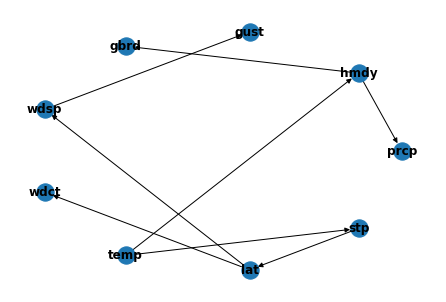

In [127]:
G_K2 = nx.DiGraph()
G_K2.add_edges_from(tree.edges())
nx.draw(G_K2, pos, with_labels=True, font_weight='bold')

In [128]:
k2_scores["tree"] = K2Score(df_trans).score(tree)

print(f"K2 score of tree model {K2Score(df_trans).score(tree):.2f}")
print(f"BIC score of tree model {BicScore(df_trans).score(tree):.2f}")

K2 score of tree model -163195.47
BIC score of tree model -163288.19


In [129]:
df_stree = sampling(tree, df_prob, n=2000, new=True)
get_scores(df_trans, df_stree)

/Users/murovadarya/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


  0%|          | 0/9 [00:00<?, ?it/s]

R-2 score is: 0.5798396794698253
RMSE is: 1.1077726952503197
MAE is: 0.7831220591971544


(0.5798396794698253, 1.1077726952503197, 0.31271339366911877)

In [130]:
r2, rmse, mae = get_scores(df_trans, df_stree)
data_r2.append(r2)
data_rmse.append(rmse)
data_mape.append(mae)

R-2 score is: 0.5798396794698253
RMSE is: 1.1077726952503197
MAE is: 0.7831220591971544


In [134]:
search = HillClimbSearch(df_trans)
k2_unconstr = search.estimate()

df_k2c = sampling(k2_unconstr, df_prob, n=2000, new=True)
get_scores(df_trans, df_k2c)

  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/murovadarya/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


  0%|          | 0/9 [00:00<?, ?it/s]

R-2 score is: 0.740301136154244
RMSE is: 1.6131234210049044
MAE is: 1.4815390845574652


(0.740301136154244, 1.6131234210049044, 0.4022395381063077)

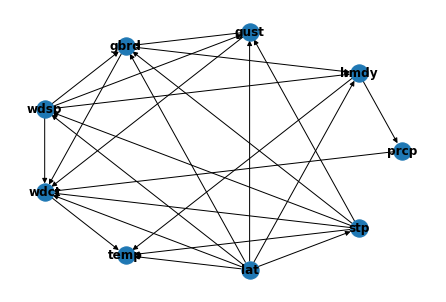

In [132]:
G_K2 = nx.DiGraph()
G_K2.add_edges_from(k2_unconstr.edges())
nx.draw(G_K2, pos, with_labels=True, font_weight='bold')

In [133]:
k2_scores["k2_unconstr"] = K2Score(df_trans).score(k2_unconstr)

print(f"K2 score of unconstrained model {K2Score(df_trans).score(k2_unconstr):.2f}")
print(f"BIC score of unconstrained model {BicScore(df_trans).score(k2_unconstr):.2f}")

K2 score of unconstrained model -156259.83
BIC score of unconstrained model -485252.49


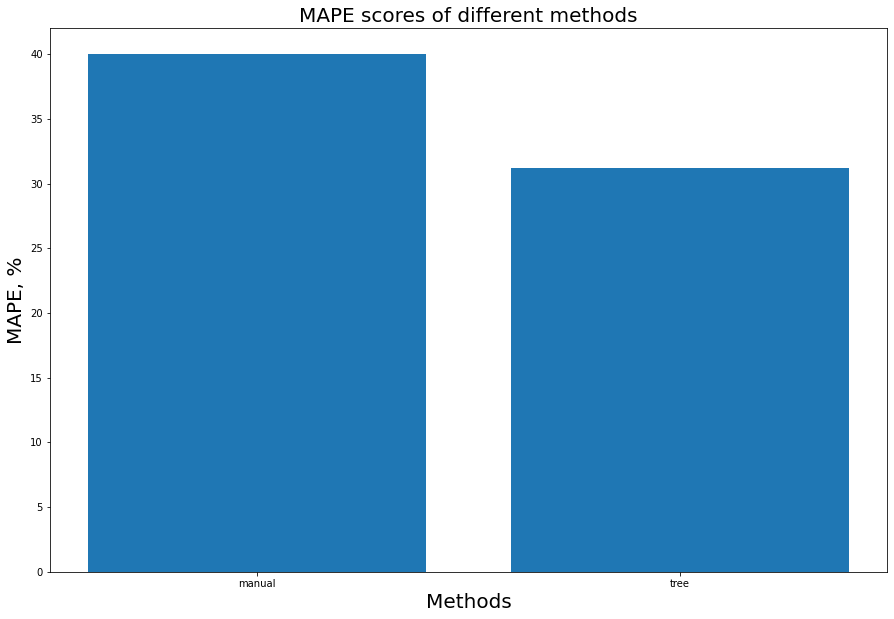

In [122]:
plt.figure(figsize=(15, 10))
x = ["manual", "tree", "Hill"]
# y = [0.8242023774658618, 0.8898068766957087, 0.9200255171923536]
# y = data_aucs.values
plt.bar(x, [i*100 for i in data_mape])
plt.title('MAPE scores of different methods', fontsize=20)
plt.xlabel('Methods', fontsize=20)
plt.ylabel('MAPE, %', fontsize=20)
# plt.ylim(0.82, 0.95)
plt.show()

In [123]:
data_mape

[0.40015299041825547, 0.31217741372341895]

Text(0, 0.5, 'RMSE')

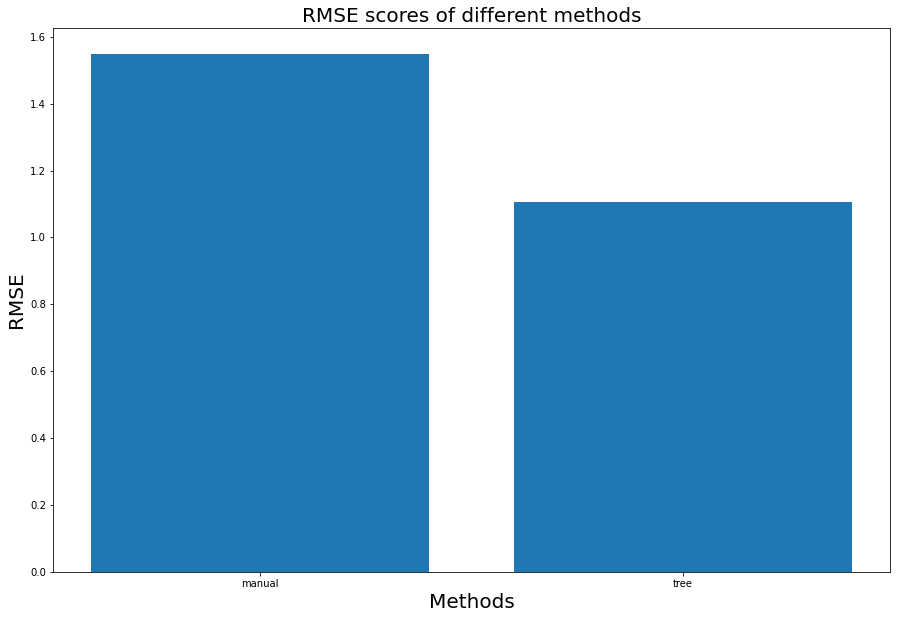

In [124]:
plt.figure(figsize=(15, 10))
x = ["manual", "tree",]
# y = [0.8242023774658618, 0.8898068766957087, 0.9200255171923536]
# y = data_aucs.values
plt.bar(x, data_rmse)
plt.title('RMSE scores of different methods', fontsize=20)
plt.xlabel('Methods', fontsize=20)
plt.ylabel('RMSE', fontsize=20)
# plt.ylim(0.82, 0.95)


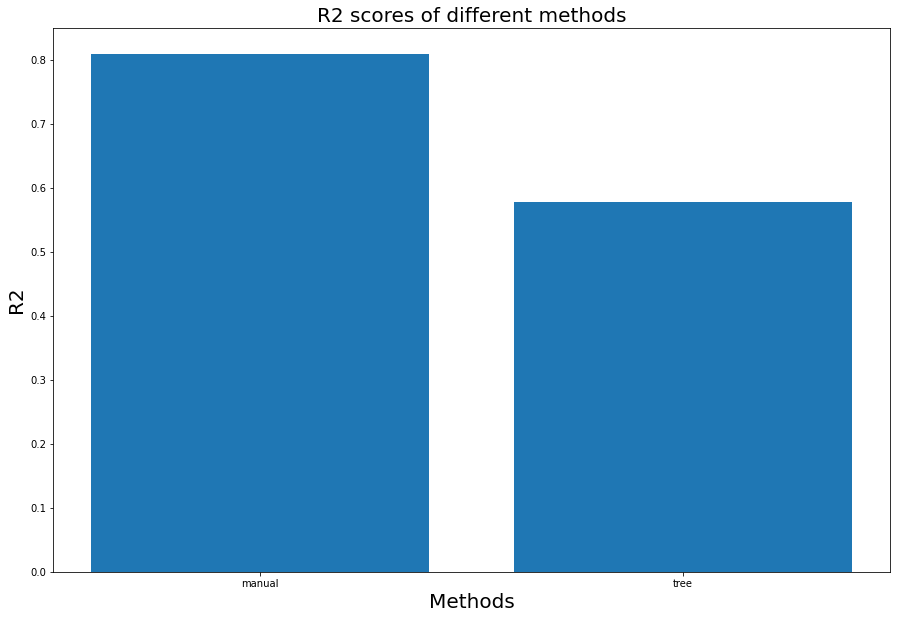

In [125]:
plt.figure(figsize=(15, 10))
x = ["manual", "tree"]
plt.bar(x, data_r2)
plt.title('R2 scores of different methods', fontsize=20)
plt.xlabel('Methods', fontsize=20)
plt.ylabel('R2', fontsize=20)
plt.show()